In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df=pd.read_csv('HeightWeight.csv')
df.head()
df=df.drop('Index',axis=1)
df.head()
df=df.iloc[:50]
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [ ]:
data=df.max()-df.min()
data

,0
Height(Inches),8.32369
Weight(Pounds),55.12499


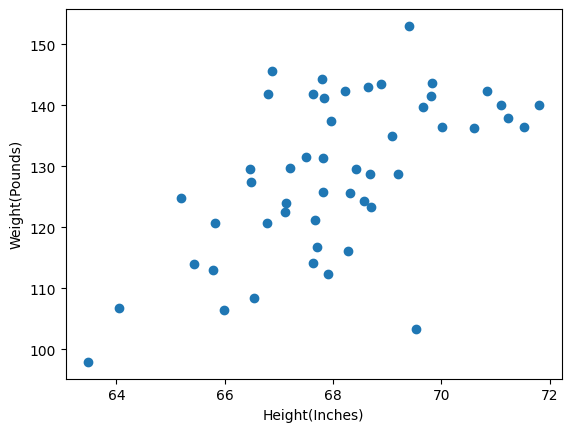

In [ ]:
plt.scatter(df["Height(Inches)"],df["Weight(Pounds)"])
plt.xlabel("Height(Inches)")
plt.ylabel("Weight(Pounds)")
plt.show()


In [ ]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.592329
Weight(Pounds),0.592329,1.000000


<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

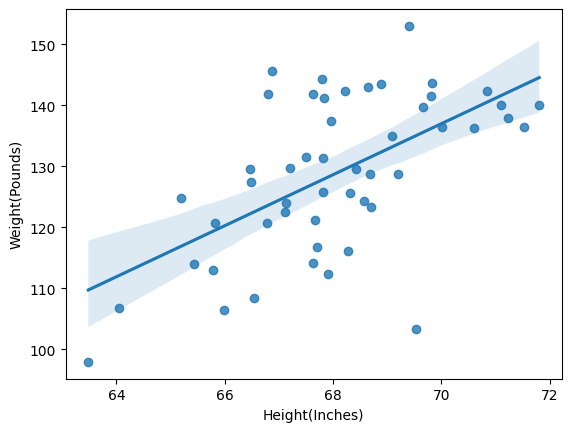

In [ ]:
#seaborn for visualisation
import seaborn as sns
sns.regplot(x="Height(Inches)",y="Weight(Pounds)",data=df)

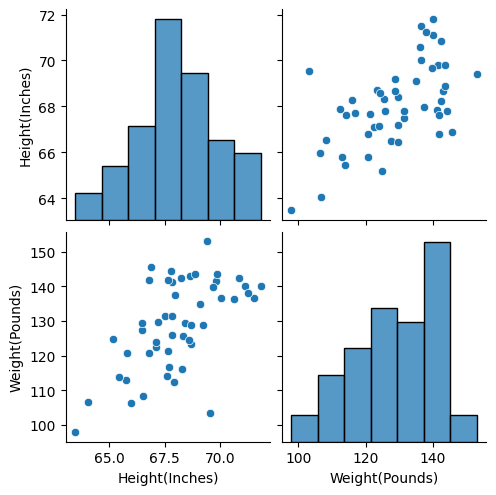

In [ ]:
sns.pairplot(df)

In [ ]:
X=df[['Height(Inches)']]  #independent variable should me in 2 D array
y=df['Weight(Pounds)']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(35, 1)

In [ ]:
#standarization ( Z score , u=0 , sd=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_test

array([[-0.48666254],
       [-2.07847896],
       [ 0.76075729],
       [ 0.31978018],
       [ 0.30774519],
       [ 0.91514412],
       [ 1.44442447],
       [-0.43893723],
       [-0.12398541],
       [-0.47908495],
       [ 0.128003  ],
       [-0.13875185],
       [-0.2055507 ],
       [-0.07922997],
       [ 0.08349116]])

In [ ]:
#apply linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regression.coef_)
print(regression.intercept_)

[8.07842822]
129.32812599999997


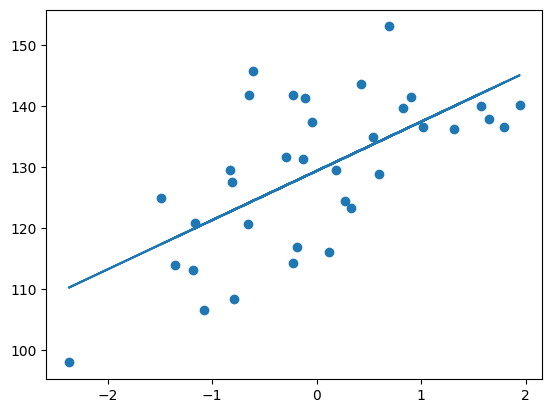

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [ ]:
#prediction for test data
y_pred=regression.predict(X_test)
print(y_pred)

[125.39665762 112.53728288 135.47384919 131.9114472  131.81422341
 136.72105207 140.99680537 125.78220312 128.32651877 125.45787259
 130.36218901 128.20722911 127.66759939 128.68807236 130.00260334]


#Prediction on test data
y_pred=intercept+coef_(weight)
y_pred=129.32+8.07(weight)


In [ ]:
#Performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
#

135.1233331059706
8.492358171993168
0.20820826445586393


In [ ]:
#OLS
import statsmodels.api as sm
model=sm.OLS(y,X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              6640.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):                    5.55e-54
Time:                        07:45:51   Log-Likelihood:                         -191.21
No. Observations:                  50   AIC:                                      384.4
Df Residuals:                      49   BIC:                                      386.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
#prediction on new data
from sklearn.preprocessing import StandardScaler # Import the StandardScaler

# Assuming you want to use the same scaling as applied to your training data
# You'll need to fit a new scaler or reload a saved one from your training phase
scaler = StandardScaler()
# Fit the scaler (replace X_train with your training data)
scaler.fit(X_train)

print(regression.predict(scaler.transform([[100]])))

[937.1709482]
